In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
fire_df = pd.read_csv("Resources/fire_data/fire_all_clean.csv", index_col="City_ID")
fire_df.head()

,Name,Admin unit,County,Acres burned,Lon,Lat,Date extinguished,Date created,Duration (days),Year extinguished,Year,Month created (num),Month
City_ID,,,,,,,,,,,,,
0,Bridge Fire,Shasta-Trinity National Forest,Shasta,37.0,-122.309000,40.774000,2018-01-09,2017-10-31,70 days,2018,2017,10,October
1,Pala Fire,CAL FIRE San Diego Unit,San Diego,122.0,1.000000,1.000000,2009-05-25,2009-05-24,1 days,2009,2009,5,May
2,River Fire,CAL FIRE San Bernardino Unit,Inyo,407.0,-118.016510,36.602575,2013-02-28,2013-02-24,4 days,2013,2013,2,February
3,Fawnskin Fire,San Bernardino National Forest,San Bernardino,30.0,-116.941311,34.288877,2013-04-22,2013-04-20,2 days,2013,2013,4,April
4,Gold Fire,CAL FIRE Madera-Mariposa-Merced Unit,Madera,274.0,-119.635004,37.116295,2013-05-01,2013-04-30,1 days,2013,2013,4,April


In [3]:
rainfall_df = pd.read_csv("Resources/weather_data/rainfall_all_years_clean.csv", index_col="City_ID")
rainfall_df.head()

,State,County,Rainfall (inches),Month,Year,Anomaly (1901-2000 base period),1901-2000 Mean
City_ID,,,,,,,
0,California,Alameda,0.63,March,2013,-2.24,2.87
1,California,Alpine,2.56,March,2013,-2.54,5.10
2,California,Amador,2.89,March,2013,-2.72,5.61
3,California,Butte,2.57,March,2013,-3.77,6.34
4,California,Calaveras,2.75,March,2013,-2.83,5.58


In [4]:
temperature_df = pd.read_csv("Resources/weather_data/temperature_all_years_clean.csv", index_col="City_ID")
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7772 entries, 0 to 7771
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            7772 non-null   object 
 1   County                           7772 non-null   object 
 2   Temperature (F)                  7772 non-null   float64
 3   Month                            7772 non-null   object 
 4   Year                             7772 non-null   int64  
 5   Anomaly (1901-2000 base period)  7772 non-null   float64
 6   1901-2000 Mean                   7772 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 485.8+ KB


In [5]:
fire_vs_rainfall_all = pd.merge(rainfall_df, fire_df, on=["Month", "Year", "County"], how="outer")

fire_vs_rainfall_all

,State,County,Rainfall (inches),Month,Year,Anomaly (1901-2000 base period),1901-2000 Mean,Name,Admin unit,Acres burned,Lon,Lat,Date extinguished,Date created,Duration (days),Year extinguished,Month created (num)
0,California,Alameda,0.63,March,2013,-2.24,2.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,California,Alpine,2.56,March,2013,-2.54,5.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,California,Amador,2.89,March,2013,-2.72,5.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,California,Butte,2.57,March,2013,-3.77,6.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,Calaveras,2.75,March,2013,-2.83,5.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,NaN,"El Dorado, Alpine, Amador",NaN,August,2021,NaN,NaN,Caldor Fire,El Dorado National Forest,221835.0,-120.537833,38.586000,2021-10-21,2021-08-14,68 days,2021.0,8.0
8650,NaN,"Riverside, San Diego",NaN,August,2021,NaN,NaN,Chaparral Fire,Cleveland National Forest,1427.0,-117.393090,33.484721,2021-09-01,2021-08-28,4 days,2021.0,8.0
8651,NaN,"Napa, Sonoma",NaN,September,2021,NaN,NaN,Fremont Fire,CAL FIRE Sonoma-Lake-Napa Unit,116.0,-122.416983,38.269863,2021-09-23,2021-09-22,1 days,2021.0,9.0
8652,NaN,"El Dorado, Placer",NaN,September,2022,NaN,NaN,Mosquito Fire,"Unified Command: Tahoe National Forest, El Dor...",76788.0,-120.744700,39.005910,2022-10-22,2022-09-06,46 days,2022.0,9.0


In [6]:
fire_vs_rainfall_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8654 entries, 0 to 8653
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            8608 non-null   object 
 1   County                           8654 non-null   object 
 2   Rainfall (inches)                8608 non-null   float64
 3   Month                            8654 non-null   object 
 4   Year                             8654 non-null   int64  
 5   Anomaly (1901-2000 base period)  8608 non-null   float64
 6   1901-2000 Mean                   8608 non-null   float64
 7   Name                             1943 non-null   object 
 8   Admin unit                       1934 non-null   object 
 9   Acres burned                     1943 non-null   float64
 10  Lon                              1943 non-null   float64
 11  Lat                              1943 non-null   float64
 12  Date extinguished   

In [7]:
fire_vs_rainfall_df = fire_vs_rainfall_all.dropna()

In [8]:
fire_vs_rainfall_df

,State,County,Rainfall (inches),Month,Year,Anomaly (1901-2000 base period),1901-2000 Mean,Name,Admin unit,Acres burned,Lon,Lat,Date extinguished,Date created,Duration (days),Year extinguished,Month created (num)
77,California,Madera,0.87,April,2013,-1.16,2.03,Gold Fire,CAL FIRE Madera-Mariposa-Merced Unit,274.0,-119.635004,37.116295,2013-05-01,2013-04-30,1 days,2013.0,4.0
85,California,Napa,1.05,April,2013,-0.86,1.91,Silverado Fire,CAL FIRE Sonoma-Lake-Napa Unit,75.0,-122.350844,38.441792,2013-05-01,2013-04-30,1 days,2013.0,4.0
93,California,San Bernardino,0.02,April,2013,-0.36,0.38,Fawnskin Fire,San Bernardino National Forest,30.0,-116.941311,34.288877,2013-04-22,2013-04-20,2 days,2013.0,4.0
126,California,Glenn,0.31,May,2013,-0.54,0.85,306 Fire,CAL FIRE Tehama-Glenn Unit,217.0,-122.560862,39.514139,2013-05-05,2013-05-01,4 days,2013.0,5.0
134,California,Los Angeles,0.55,May,2013,0.23,0.32,Lake Fire,CAL FIRE/Los Angeles County,712.0,-118.610044,34.491490,2013-05-18,2013-05-17,1 days,2013.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8326,California,Fresno,0.59,May,2023,-0.24,0.83,Pistol Fire,CAL FIRE Fresno-Kings Unit,123.0,-119.680100,36.946600,2023-05-30,2023-05-30,0 days,2023.0,5.0
8349,California,Riverside,0.28,May,2023,0.12,0.16,66 Fire,CAL FIRE Riverside Unit,127.0,-116.092746,33.569342,2023-05-18,2023-05-15,3 days,2023.0,5.0
8350,California,Riverside,0.28,May,2023,0.12,0.16,Ramona Fire,Riverside County Fire,348.0,-117.033714,33.823424,2023-05-25,2023-05-22,3 days,2023.0,5.0
8518,California,Monterey,7.66,February,2024,3.56,4.10,Bryson Fire,CAL FIRE San Benito-Monterey Unit,11.0,-121.084104,35.811480,2024-02-27,2024-02-27,0 days,2024.0,2.0


In [9]:
# Selecting only the necessary columns
selected_columns = ['Month', 'Year', 'Acres burned', 'Rainfall (inches)']
cleaned_df = fire_vs_rainfall_df[selected_columns]
cleaned_df.head()

,Month,Year,Acres burned,Rainfall (inches)
77,April,2013,274.0,0.87
85,April,2013,75.0,1.05
93,April,2013,30.0,0.02
126,May,2013,217.0,0.31
134,May,2013,712.0,0.55


In [10]:
# Selecting only the necessary columns

selected_columns = ['Month', 'Year', 'Acres burned', 'Rainfall (inches)']
cleaned_df = fire_vs_rainfall_df[selected_columns]

#set months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#organize months
cleaned_df['Month'] = pd.Categorical(cleaned_df['Month'], categories=months, ordered=True)
cleaned_df.sort_values(by=['Year', 'Month'], inplace=True)
  # same as you have now; can use inplace=True

cleaned_df.head()

,Month,Year,Acres burned,Rainfall (inches)
695,February,2013,407.0,0.03
77,April,2013,274.0,0.87
85,April,2013,75.0,1.05
93,April,2013,30.0,0.02
126,May,2013,217.0,0.31


In [11]:
#Count of incidents in each month
incidents_by_month = cleaned_df.groupby(['Year', 'Month']).size()
print("Count of incidents in each month:")
print(incidents_by_month)

Count of incidents in each month:
Year  Month    
2013  January       0
      February      1
      March         0
      April         3
      May          23
                   ..
2024  August        0
      September     0
      October       0
      November      0
      December      0
Length: 144, dtype: int64


In [12]:
#Mean of acres burned per month vs rainfall
acres_vs_rainfall_by_month = cleaned_df.groupby(['Year', 'Month']).agg({'Acres burned': 'mean', 'Rainfall (inches)': 'mean'})
acres_vs_rainfall_by_month

Acres burned  Rainfall (inches)
Year Month                                     
2013 January             NaN                NaN
     February     407.000000           0.030000
     March               NaN                NaN
     April        126.333333           0.646667
     May         2198.695652           0.295652
...                      ...                ...
2024 August              NaN                NaN
     September           NaN                NaN
     October             NaN                NaN
     November            NaN                NaN
     December            NaN                NaN

[144 rows x 2 columns]

In [13]:
#Mean of acres burned per year vs rainfall
acres_vs_rainfall_by_year = cleaned_df.groupby('Year').agg({'Acres burned': 'mean', 'Rainfall (inches)': 'mean'})
acres_vs_rainfall_by_year

,Acres burned,Rainfall (inches)
Year,,
2013,3618.632353,0.414779
2014,3897.864865,0.422297
2015,4032.947917,0.450208
2016,2899.064935,0.288117
2017,1994.267773,0.360569
2018,2009.738095,0.395000
2019,981.735000,0.446200
2020,1698.941799,0.136772
2021,5321.636986,0.548288


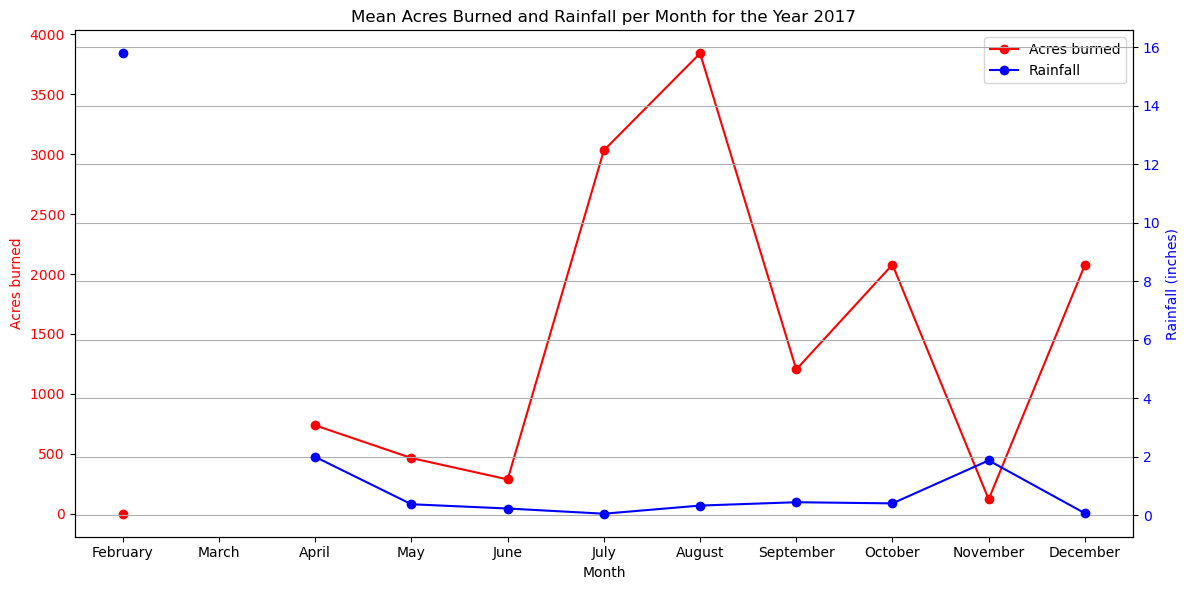

In [14]:
# Filter the data for the year 2017
acres_vs_rainfall_2017 = acres_vs_rainfall_by_month.loc[2017]

# Create subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting acres burned on primary y-axis
ax1.plot(acres_vs_rainfall_2017.index.get_level_values('Month'), acres_vs_rainfall_2017['Acres burned'], color='r', marker='o', label='Acres burned')
ax1.set_xlabel('Month')
ax1.set_ylabel('Acres burned', color='r')
ax1.tick_params(axis='y', labelcolor='r')

# Creating a secondary y-axis for rainfall
ax2 = ax1.twinx()
ax2.plot(acres_vs_rainfall_2017.index.get_level_values('Month'), acres_vs_rainfall_2017['Rainfall (inches)'], color='b', marker='o', label='Rainfall')
ax2.set_ylabel('Rainfall (inches)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Adding legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='best')

plt.title('Mean Acres Burned and Rainfall per Month for the Year 2017')
plt.grid(True)
plt.tight_layout()
plt.show()


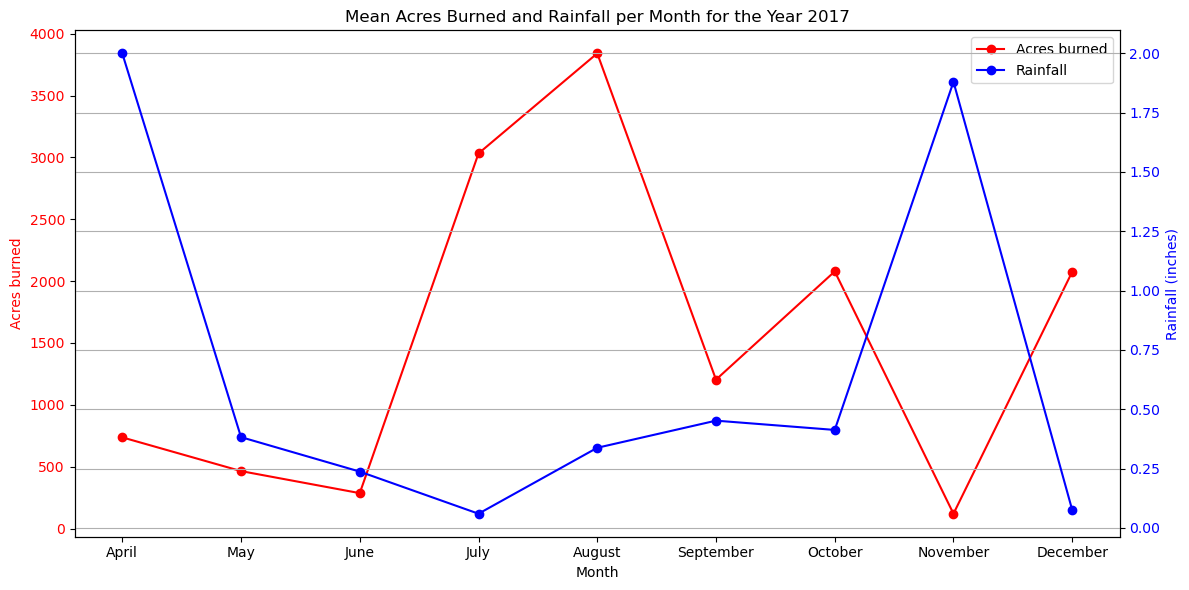

In [27]:
# Filter the data for the year 2017 and exclude February
acres_vs_rainfall_2017_filtered = acres_vs_rainfall_by_month.loc[2017].drop("February")  # Assuming February is the 2nd index

# Create subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting acres burned on primary y-axis
ax1.plot(acres_vs_rainfall_2017_filtered.index.get_level_values('Month'), acres_vs_rainfall_2017_filtered['Acres burned'], color='r', marker='o', label='Acres burned')
ax1.set_xlabel('Month')
ax1.set_ylabel('Acres burned', color='r')
ax1.tick_params(axis='y', labelcolor='r')

# Creating a secondary y-axis for rainfall
ax2 = ax1.twinx()
ax2.plot(acres_vs_rainfall_2017_filtered.index.get_level_values('Month'), acres_vs_rainfall_2017_filtered['Rainfall (inches)'], color='b', marker='o', label='Rainfall')
ax2.set_ylabel('Rainfall (inches)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Adding legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='best')

plt.title('Mean Acres Burned and Rainfall per Month for the Year 2017')
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
# Calculate Pearson correlation coefficient
pearson_corr_2017 = acres_vs_rainfall_2017['Acres burned'].corr(acres_vs_rainfall_2017['Rainfall (inches)'], method='pearson')

# Calculate Spearman correlation coefficient
spearman_corr_2017 = acres_vs_rainfall_2017['Acres burned'].corr(acres_vs_rainfall_2017['Rainfall (inches)'], method='spearman')

print("2017 Correlation Analysis")
print("Pearson correlation coefficient:", pearson_corr_2017)
print("Spearman correlation coefficient:", spearman_corr_2017)

2017 Correlation Analysis
Pearson correlation coefficient: -0.43321784437731164
Spearman correlation coefficient: -0.6


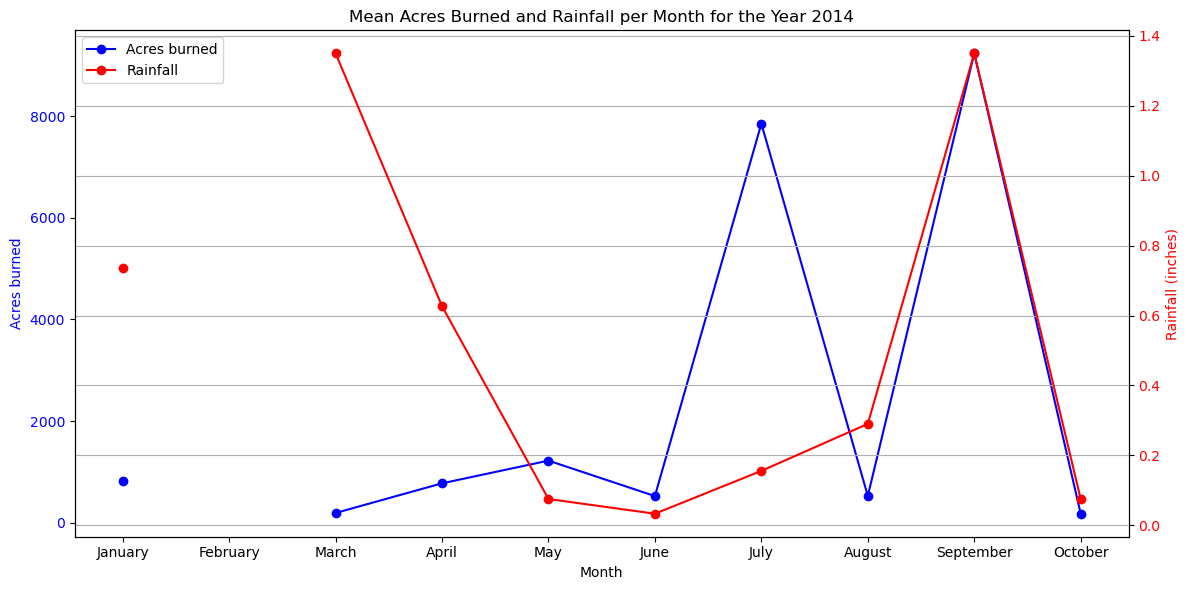

In [16]:
# Filter the data for the year 2014
acres_vs_rainfall_2014 = acres_vs_rainfall_by_month.loc[2014]

# Create subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting acres burned on primary y-axis
ax1.plot(acres_vs_rainfall_2014.index.get_level_values('Month'), acres_vs_rainfall_2014['Acres burned'], color='b', marker='o', label='Acres burned')
ax1.set_xlabel('Month')
ax1.set_ylabel('Acres burned', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Creating a secondary y-axis for rainfall
ax2 = ax1.twinx()
ax2.plot(acres_vs_rainfall_2014.index.get_level_values('Month'), acres_vs_rainfall_2014['Rainfall (inches)'], color='r', marker='o', label='Rainfall')
ax2.set_ylabel('Rainfall (inches)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adding legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='upper left')

plt.title('Mean Acres Burned and Rainfall per Month for the Year 2014')
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
# Calculate Pearson correlation coefficient
pearson_corr_2014 = acres_vs_rainfall_2014['Acres burned'].corr(acres_vs_rainfall_2014['Rainfall (inches)'], method='pearson')

# Calculate Spearman correlation coefficient
spearman_corr_2014 = acres_vs_rainfall_2014['Acres burned'].corr(acres_vs_rainfall_2014['Rainfall (inches)'], method='spearman')

print("2014 Correlation Analysis")
print("Pearson correlation coefficient:", pearson_corr_2014)
print("Spearman correlation coefficient:", spearman_corr_2014)

2014 Correlation Analysis
Pearson correlation coefficient: 0.27969380319915266
Spearman correlation coefficient: 0.26051340011296553


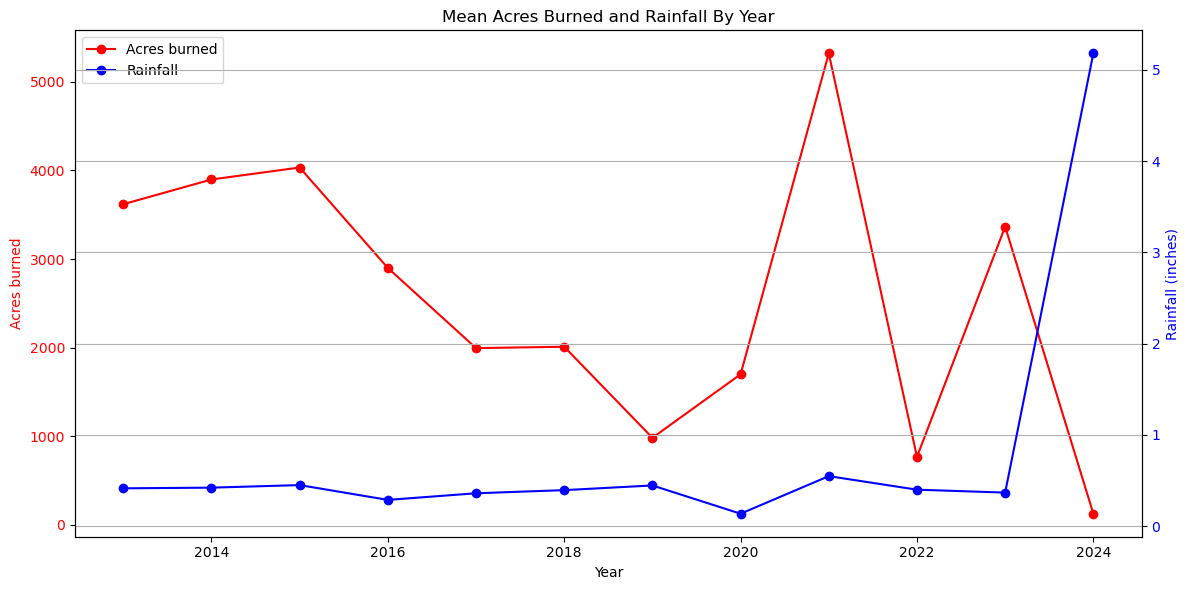

In [18]:
acres_vs_rainfall_yearly = acres_vs_rainfall_by_year

# Create subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting acres burned on primary y-axis
ax1.plot(acres_vs_rainfall_yearly.index.get_level_values('Year'), acres_vs_rainfall_yearly['Acres burned'], color='r', marker='o', label='Acres burned')
ax1.set_xlabel('Year')
ax1.set_ylabel('Acres burned', color='r')
ax1.tick_params(axis='y', labelcolor='r')

# Creating a secondary y-axis for rainfall
ax2 = ax1.twinx()
ax2.plot(acres_vs_rainfall_yearly.index.get_level_values('Year'), acres_vs_rainfall_yearly['Rainfall (inches)'], color='b', marker='o', label='Rainfall')
ax2.set_ylabel('Rainfall (inches)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Adding legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='upper left')

plt.title('Mean Acres Burned and Rainfall By Year')
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
# Calculate Pearson correlation coefficient
pearson_corr = acres_vs_rainfall_yearly['Acres burned'].corr(acres_vs_rainfall_yearly['Rainfall (inches)'], method='pearson')

# Calculate Spearman correlation coefficient
spearman_corr = acres_vs_rainfall_yearly['Acres burned'].corr(acres_vs_rainfall_yearly['Rainfall (inches)'], method='spearman')

print("Correlation Analysis through 10 years")
print("Pearson correlation coefficient:", pearson_corr)
print("Spearman correlation coefficient:", spearman_corr)

Correlation Analysis through 10 years
Pearson correlation coefficient: -0.4641197935624629
Spearman correlation coefficient: 0.16783216783216784


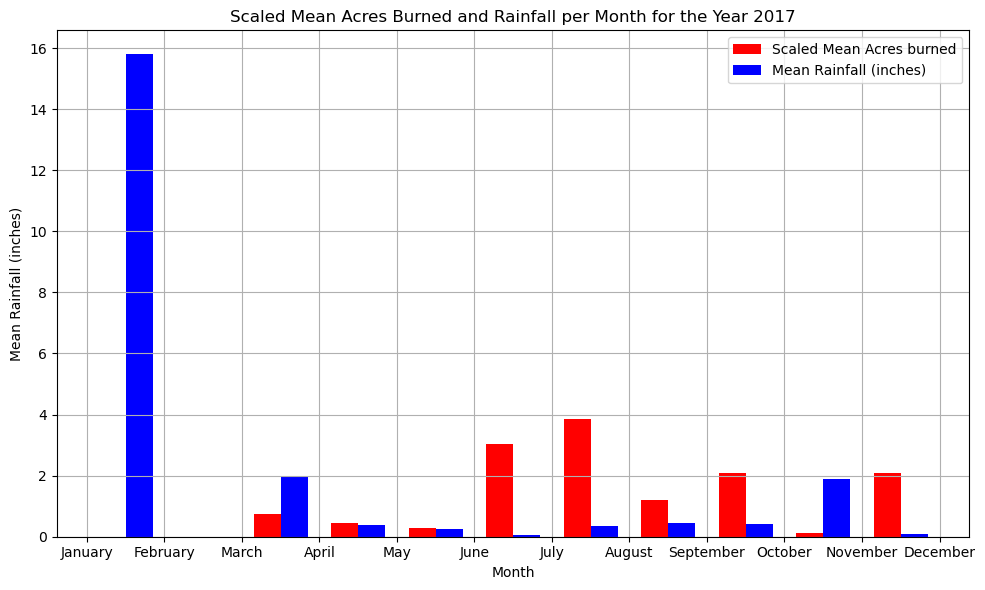

In [24]:
# Aggregate data by month
monthly_mean = acres_vs_rainfall_2017.groupby('Month').mean()

# Define the months and the width of the bars
months = monthly_mean.index
bar_width = 0.35

# Scaling down the mean value for acres burned
scaled_acres_burned = monthly_mean['Acres burned'] / 1000  # Dividing by 1000 to scale down

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the scaled mean acres burned
ax.bar(np.arange(len(months)), scaled_acres_burned, bar_width, color='r', label='Scaled Mean Acres burned')

# Plotting the mean rainfall
ax.bar(np.arange(len(months)) + bar_width, monthly_mean['Rainfall (inches)'], bar_width, color='b', label='Mean Rainfall (inches)')

# Adding labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Mean Rainfall (inches)')
plt.title('Scaled Mean Acres Burned and Rainfall per Month for the Year 2017')

# Adding x-axis ticks and labels
ax.set_xticks((np.arange(len(months)) + bar_width / 2)+ 0.5)
ax.set_xticklabels(months)

# Adding legend
ax.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
# Extracting mean acres burned and rainfall per year
mean_acres_burned = acres_vs_rainfall_by_year['Acres burned']
rainfall = acres_vs_rainfall_by_year['Rainfall (inches)']

# Performing one-way ANOVA
f_statistic, p_value = stats.f_oneway(mean_acres_burned, rainfall)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpretation of the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between mean acres burned and rainfall per year.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between mean acres burned and rainfall per year.")


F-statistic: 32.64250628073309
p-value: 9.54958043687113e-06
Reject the null hypothesis: There is a significant relationship between mean acres burned and rainfall per year.
